<a href="https://colab.research.google.com/github/albert-h-wong/DS-Unit-4-Sprint-1-Tree-Ensembles/blob/master/Unit_4_Sprint_Challenge_1_AWv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [2]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [3]:
train.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,5.191600e+04,5.191100e+04,51890.000000,51718.000000,51718.000000,51916.000000
mean,1.330265e+06,1.549491e+06,60628.834669,41.879568,-87.676663,0.258610
std,6.202664e+05,9.018283e+05,22.736963,0.081126,0.059509,0.437875
min,4.425000e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.796205e+05,1.140745e+06,60614.000000,41.830296,-87.707857,0.000000
50%,1.424226e+06,1.958619e+06,60625.000000,41.890166,-87.666524,0.000000
75%,1.946952e+06,2.215507e+06,60643.000000,41.939167,-87.634461,1.000000
max,2.279709e+06,8.700606e+06,60827.000000,42.021064,-87.525094,1.000000


In [4]:
print(train.Fail.value_counts())
print(train.Fail.value_counts(normalize=True))

0    38490
1    13426
Name: Fail, dtype: int64
0    0.74139
1    0.25861
Name: Fail, dtype: float64


In [5]:
print(test.Fail.value_counts())
print(test.Fail.value_counts(normalize=True))

0    12831
1     4475
Name: Fail, dtype: int64
0    0.741419
1    0.258581
Name: Fail, dtype: float64


In [6]:
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [7]:
train.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Fail                 int64
dtype: object

In [8]:
train.nunique()

Inspection ID      51916
DBA Name           17049
AKA Name           16350
License #          21421
Facility Type        329
Risk                   3
Address            13954
City                  39
State                  1
Zip                   86
Inspection Date     2257
Inspection Type       51
Violations         42164
Latitude           13410
Longitude          13410
Location           13410
Fail                   2
dtype: int64

In [9]:
train.Risk.unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', nan],
      dtype=object)

In [10]:
train.Risk.value_counts()

Risk 1 (High)      37731
Risk 2 (Medium)    10136
Risk 3 (Low)        4037
Name: Risk, dtype: int64

In [11]:
train.corr()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
Inspection ID,1.000000,0.194781,0.000944,0.053912,-0.008544,0.004624
License #,0.194781,1.000000,-0.016444,0.006098,0.035326,0.043235
Zip,0.000944,-0.016444,1.000000,0.185379,-0.399629,0.014190
Latitude,0.053912,0.006098,0.185379,1.000000,-0.430789,-0.014143
Longitude,-0.008544,0.035326,-0.399629,-0.430789,1.000000,0.015747
Fail,0.004624,0.043235,0.014190,-0.014143,0.015747,1.000000


In [0]:
X_train = train.copy()
X_test = test.copy()

In [0]:
# Drop columns that are random, too high in cardinality, or repeated data from other columns including Violations

X_train = X_train.drop(columns=['Inspection Date','Inspection ID','Latitude', 'Longitude', 'AKA Name', 'State', 'Violations'])  
X_test = X_test.drop(columns=['Inspection Date','Inspection ID','Latitude', 'Longitude', 'AKA Name', 'State', 'Violations'])  

In [0]:
# Ordinal encode risk

X_test.Risk.replace({'Risk 1 (High)' : 2, 'Risk 2 (Medium)': 1, 'Risk 3 (Low)': 0}, inplace=True)

In [0]:
X_train.Risk.replace({'Risk 1 (High)' : 2, 'Risk 2 (Medium)': 1, 'Risk 3 (Low)': 0}, inplace=True)


In [0]:
X_train['Risk'].fillna(X_train['Risk'].mean(), inplace=True)
X_test['Risk'].fillna(X_test['Risk'].mean(), inplace=True)

In [0]:
X_train['Zip'].fillna(X_train['Zip'].mean(), inplace=True)
X_test['Zip'].fillna(X_test['Zip'].mean(), inplace=True)


In [0]:
X_train['License #'].fillna(X_train['License #'].mean(), inplace=True)
X_test['License #'].fillna(X_test['License #'].mean(), inplace=True)

In [0]:
Y_train = X_train['Fail']
Y_test = X_test['Fail']

In [0]:
X_train = X_train.drop(columns=['Fail'])  
X_test = X_test.drop(columns=['Fail'])

In [21]:
!pip install category_encoders

In [22]:
# Use binary encoding and try RF model
import category_encoders as ce
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.BinaryEncoder(), 
    RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        min_samples_leaf=0.005, 
        oob_score=True, 
        n_jobs=-1)
)

pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('binaryencoder', BinaryEncoder(cols=['DBA Name', 'Facility Type', 'Address', 'City', 'Inspection Type', 'Location'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=True, verbose=0)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True...mators=100, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False))])

In [23]:
# Out-of-Bag estimated score
from sklearn.metrics import roc_auc_score

y_pred_proba = pipeline.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
print('ROC AUC, Out-of-Bag estimate:', roc_auc_score(Y_train, y_pred_proba))

ROC AUC, Out-of-Bag estimate: 0.661263724132091


In [24]:
# Test score for RF model, a bit of overfit
y_test_pred_proba = pipeline.predict(X_test)
print('ROC AUC, test', roc_auc_score(Y_test, y_test_pred_proba))

ROC AUC, test 0.6090589785823353


In [0]:
# Try xgb with gridsearch
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [26]:
pipeline2 = make_pipeline(
    ce.BinaryEncoder(), 
    XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=4,
                  min_child_weight=1, gamma=0, subsample=0.8, 
                  colsample_bytree=0.8, objective= 'binary:logistic',
                  scale_pos_weight=1, reg_alpha = 0)
)

param_grid = {
    'xgbclassifier__max_depth':[4, 5, 6]
}

gridsearch = GridSearchCV(pipeline2, param_grid=param_grid, cv=3,
                         scoring='roc_auc', verbose=10)

gridsearch.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] xgbclassifier__max_depth=4 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgbclassifier__max_depth=4, score=0.6972083814813499, total=  13.2s
[CV] xgbclassifier__max_depth=4 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV]  xgbclassifier__max_depth=4, score=0.6984050910705966, total=  13.8s
[CV] xgbclassifier__max_depth=4 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.2s remaining:    0.0s


[CV]  xgbclassifier__max_depth=4, score=0.703378560200647, total=  13.4s
[CV] xgbclassifier__max_depth=5 ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.6s remaining:    0.0s


[CV]  xgbclassifier__max_depth=5, score=0.6993612159977487, total=  15.5s
[CV] xgbclassifier__max_depth=5 ......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV]  xgbclassifier__max_depth=5, score=0.7000850050292393, total=  15.8s
[CV] xgbclassifier__max_depth=5 ......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s


[CV]  xgbclassifier__max_depth=5, score=0.7064525705726366, total=  15.7s
[CV] xgbclassifier__max_depth=6 ......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s


[CV]  xgbclassifier__max_depth=6, score=0.7035975449213159, total=  18.2s
[CV] xgbclassifier__max_depth=6 ......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.9min remaining:    0.0s


[CV]  xgbclassifier__max_depth=6, score=0.7005881379622654, total=  18.5s
[CV] xgbclassifier__max_depth=6 ......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV]  xgbclassifier__max_depth=6, score=0.7029569836756555, total=  18.6s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('binaryencoder', BinaryEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
       impute_missing=True, return_df=True, verbose=0)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, ma...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'xgbclassifier__max_depth': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [27]:
# Cross validation score
print('Cross Validation Score:', gridsearch.best_score_)


Cross Validation Score: 0.7023809122881676


In [28]:
# xgb performs much better than RF without extra feature engineering
y_test2_pred_proba = gridsearch.predict_proba(X_test)[:, 1] 
print('Test ROC AUC:', roc_auc_score(Y_test, y_test2_pred_proba))

Test ROC AUC: 0.7162028414946517


In [29]:
!pip install eli5

In [30]:
import eli5
from eli5.sklearn import PermutationImportance

encoder = ce.BinaryEncoder()
X_train_transformed = encoder.fit_transform(X_train)

model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    min_samples_leaf=0.005, 
    n_jobs=-1)

model.fit(X_train_transformed, Y_train)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=3, cv='prefit')
permuter.fit(X_train_transformed, Y_train)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=0.005,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
           n_iter=3, random_state=None, refit=True, scoring='roc_auc')

In [31]:
eli5.show_weights(permuter, top=None, feature_names=X_train_transformed.columns.tolist())


Weight,Feature
0.0825 ± 0.0026,Inspection Type_4
0.0648 ± 0.0027,Inspection Type_5
0.0317 ± 0.0021,Inspection Type_6
0.0158 ± 0.0016,License #
0.0100 ± 0.0005,Zip
0.0033 ± 0.0004,Address_9
0.0031 ± 0.0001,DBA Name_5
0.0024 ± 0.0003,Location_3
0.0023 ± 0.0004,Facility Type_9
0.0023 ± 0.0005,Risk


In [32]:
!pip install pdpbox

In [33]:
# PDP
X_test_transformed = encoder.transform(X_test)
y_pred_proba_pdp = model.predict_proba(X_test_transformed)[:,1]
print('Validation ROC AUC:', roc_auc_score(Y_test, y_pred_proba_pdp))

Validation ROC AUC: 0.660912646527766


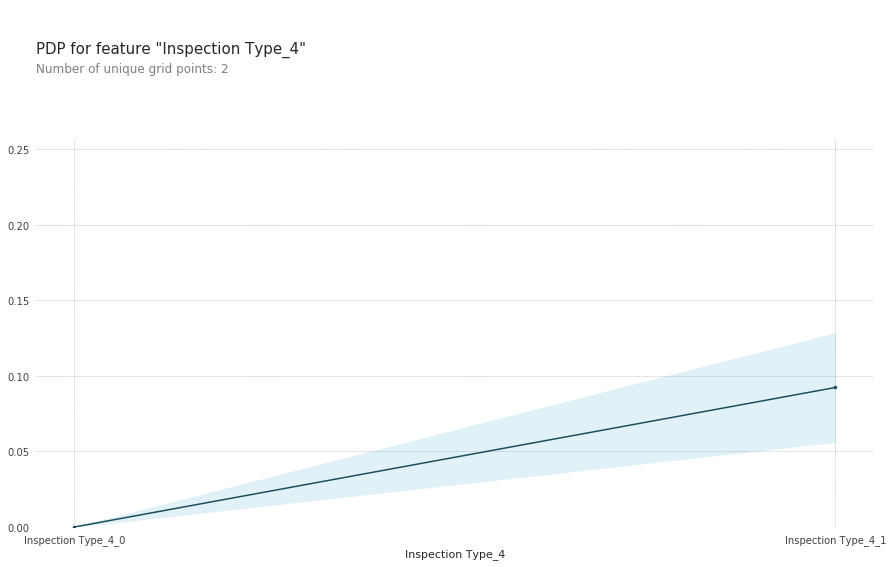

In [34]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='Inspection Type_4'
pdp_isolated = pdp_isolate(model=model, dataset=X_test_transformed, 
                           model_features=X_test_transformed.columns, 
                           feature=feature)
pdp_plot(pdp_isolated, feature);

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
# RF model confusion matrix

threshold = 0.5
y_pred = y_test_pred_proba >= threshold

pd.DataFrame(confusion_matrix(Y_test, y_pred), 
             columns=['Predicted Fail', 'Predicted Pass'], 
             index=['Actual Fail', 'Actual Pass'])

,Predicted Fail,Predicted Pass
Actual Fail,7587,5244
Actual Pass,1670,2805


In [37]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.59      0.69     12831
           1       0.35      0.63      0.45      4475

   micro avg       0.60      0.60      0.60     17306
   macro avg       0.58      0.61      0.57     17306
weighted avg       0.70      0.60      0.63     17306



Area under the Receiver Operating Characteristic curve: 0.6090589785823353


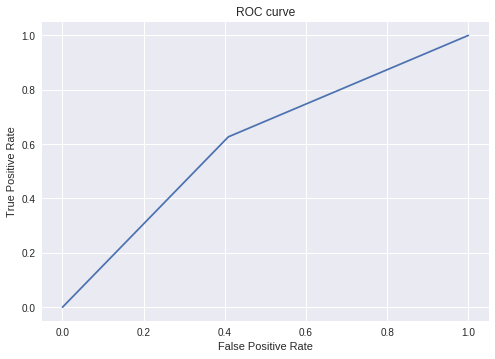

In [38]:
# ROC curve for RF model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(Y_test, y_test_pred_proba))

In [39]:
# xgb confusion matrix

threshold = 0.5
y_pred2 = y_test2_pred_proba >= threshold

pd.DataFrame(confusion_matrix(Y_test, y_pred2), 
             columns=['Predicted Fail', 'Predicted Pass'], 
             index=['Actual Fail', 'Actual Pass'])

,Predicted Fail,Predicted Pass
Actual Fail,12383,448
Actual Pass,3805,670


In [40]:
print(classification_report(Y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.76      0.97      0.85     12831
           1       0.60      0.15      0.24      4475

   micro avg       0.75      0.75      0.75     17306
   macro avg       0.68      0.56      0.55     17306
weighted avg       0.72      0.75      0.69     17306



Area under the Receiver Operating Characteristic curve: 0.7162028414946517


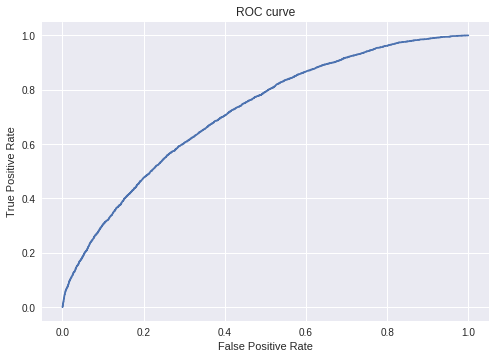

In [41]:
# xgb ROC curve

fpr, tpr, thresholds = roc_curve(Y_test, y_test2_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(Y_test, y_test2_pred_proba))

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. You may use any tools and techniques for categorical encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, engineer new features, and use any alternative categorical encoding instead of One-Hot or Ordinal/Label encoding._

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot

_To earn a score of 3 for this part, make at least two of these visualization types._